In [1]:
import matplotlib.pyplot as plt 
font = {'family' : 'normal','size'   : 12}
import matplotlib
matplotlib.rc('font', **font)

import pandas as pd
from IPython.display import display, HTML
display(HTML("<style>.container { width:100% !important; }</style>"))

import warnings
warnings.filterwarnings('ignore')
import seaborn as sns
import numpy as np

# <img style="float: left; padding: 0px 10px 0px 0px;" src="https://upload.wikimedia.org/wikipedia/commons/thumb/8/84/Escudo_de_la_Pontificia_Universidad_Cat%C3%B3lica_de_Chile.svg/1920px-Escudo_de_la_Pontificia_Universidad_Cat%C3%B3lica_de_Chile.svg.png"  width="80" /> MCD3020 - Introducción a Ciencia de Datos

## Tutorial 10: Regresión Lineal.
---

## Introducción.


Para ilustrar la implementación de modelos de regresión lineal, tenemos como ejemplo un dataset con datos de automóviles, extraidos del repositorio UCI Machine Learning Repository:

https://archive.ics.uci.edu/ml/datasets/auto+mpg


*The data concerns city-cycle fuel consumption in miles per gallon, to be predicted in terms of 3 multivalued discrete and 5 continuous attributes." (Quinlan, 1993)* <br>

Los datos incluyen datos sobre características del diseño e ingeniería de distintos modelos de autos, como se describe a continuación:

- `mpg`: rendimiento de combustible en millas/galón. 
- `cylinders`: número de cilindros. 
- `displacement`: desplazamiento (cu.in.), volumen combinado de los pistones dentro de los cilindros de un motor.
- `horsepower`: potencia en "caballos de fuerza". 
- `weight`: peso (en miles de libras).
- `acceleration`: tiempo en recorrer 1/4 de milla desde el reposo.
- `origin`: origen.
- `car name`: nombre del modelo.


El objetivo es predecir el consumo de un vehículo, en función de sus parámetros de diseño e ingeniería.

##  1. Regresión Lineal Simple con `statsmodels`.

Para implementar regresiones lineales y predecir los outcomes para distintas variables de entrada, podemos usar distintas librerías de `python`:

* [scipy.stats](https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.linregress.html).
* [statsmodels](http://www.statsmodels.org/stable/regression.html) y 
* [scikit-learn (sklearn)](http://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html).


Para efectos de regresiones lineales simples,`scipy`, `statsmodels` y `sklearn` hacen lo mismo. Más en general,  `statsmodels` tiende a ser más fácil para problemas de inferencia (econtrar los parámetros de la regresión y analizar sus incertezas) mientras que  `sklearn` tiene un enfoque de machine learning y es más práctico para realizar predicciones.


### 1.1 Explore los datos y las posibles relaciones entre las variables que caracterizan un auto, y su consumo de combustible.

In [3]:
#Datos de entrada
dfcars = pd.read_csv('https://raw.githubusercontent.com/paguirre-uc/mds3020_2022/main/semana6/auto-mpg.csv')

In [4]:
dfcars.dropna(axis=0,inplace=True)
dfcars=dfcars[dfcars['horsepower']!='?']
dfcars['horsepower']=dfcars['horsepower'].astype('float')
dfcars

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin,car name
0,18.0,8,307.0,130.0,3504,12.0,70,1,chevrolet chevelle malibu
1,15.0,8,350.0,165.0,3693,11.5,70,1,buick skylark 320
2,18.0,8,318.0,150.0,3436,11.0,70,1,plymouth satellite
3,16.0,8,304.0,150.0,3433,12.0,70,1,amc rebel sst
4,17.0,8,302.0,140.0,3449,10.5,70,1,ford torino
...,...,...,...,...,...,...,...,...,...
393,27.0,4,140.0,86.0,2790,15.6,82,1,ford mustang gl
394,44.0,4,97.0,52.0,2130,24.6,82,2,vw pickup
395,32.0,4,135.0,84.0,2295,11.6,82,1,dodge rampage
396,28.0,4,120.0,79.0,2625,18.6,82,1,ford ranger


findfont: Font family ['normal'] not found. Falling back to DejaVu Sans.


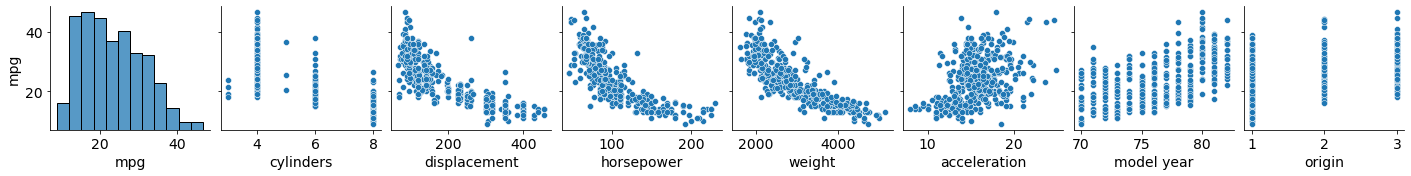

In [5]:
sns.pairplot(dfcars,y_vars='mpg');


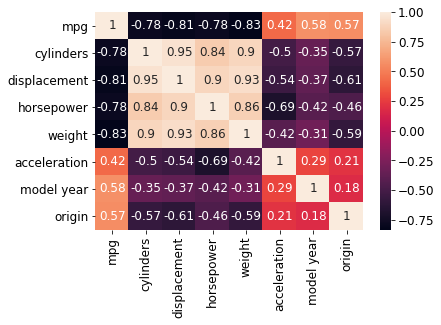

In [22]:
sns.heatmap(dfcars.corr(),annot=True);

#### Exploremos los datos: ¿cuál es el rendimiento promedio para distintas combinaciones de cilindros y hp?

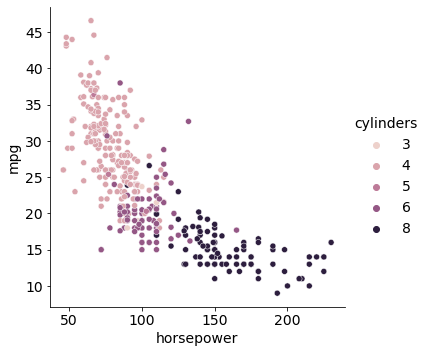

In [7]:
sns.pairplot(data=dfcars,y_vars='mpg',x_vars='horsepower',hue='cylinders',size=5);

### 1.2 Use `statsmodel` para ajustar los datos de entrenamiento usando una regresión lineal simple. 

- Nota sobre constantes:

Supongamos un caso sencillo, en que tenemos 2 observaciones con un predictor y una variable de respuesta cada una. Tendríamos por lo tanto el siguiente sistema de ecuaciones para el modelo de regresión lineal simple:
 $$y_1=\beta_0 + \beta_1\cdot x_1$$ $$y_2=\beta_0 + \beta_1\cdot x_2$$ <BR>
    
En notación matricial, esto sería: 
    
$$
\left [
\begin{array}{c}
y_1 \\ y_2 \\
\end{array}
\right] =
\left [
\begin{array}{cc}
1& x_1 \\ 1 & x_2 \\
\end{array}
\right] 
\cdot
\left [
\begin{array}{c}
\beta_0 \\ \beta_1 \\
\end{array}
\right]
$$
<BR><BR>
    
`sklearn` agrega automáticamente la constante `1`, mientras que en  `statsmodels` hay que agregarla explícitamente usando `sm.add_constant`

In [8]:
x = dfcars.horsepower
y = dfcars.mpg

In [10]:
import statsmodels.api as sm

# crear la X matriz X agregando una columna de 1s a x
X = sm.add_constant(x)
X

,const,horsepower
0,1.0,130.0
1,1.0,165.0
2,1.0,150.0
3,1.0,150.0
4,1.0,140.0
...,...,...
393,1.0,86.0
394,1.0,52.0
395,1.0,84.0
396,1.0,79.0


In [11]:
# definir el modelo de regresión por mínimos cuadrados (OLS)
regr = sm.OLS(y, X)

# ajustar el modelo y guardar los resultados de la regresión en (parametros,R2, etc) en results_sm
results = regr.fit()

results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    mpg   R-squared:                       0.606
Model:                            OLS   Adj. R-squared:                  0.605
Method:                 Least Squares   F-statistic:                     599.7
Date:                Fri, 11 Nov 2022   Prob (F-statistic):           7.03e-81
Time:                        15:32:59   Log-Likelihood:                -1178.7
No. Observations:                 392   AIC:                             2361.
Df Residuals:                     390   BIC:                             2369.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         39.9359      0.717     55.660      0.000      38.525      41.347
horsepower    -0.1578      0.006    -24.489      0.000      -0.171      -0.145
==============================================================================
Omnibus:                       16.432   Durbin-Watson:                   0.920
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               17.305
Skew:                           0.492   Prob(JB):                     0.000175
Kurtosis:                       3.299   Cond. No.                         322.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [12]:
# coeficientes beta
beta0 = results.params[0]
beta1 = results.params[1]


In [13]:
from statsmodels.tools import eval_measures

y_pred=results.predict(X)
rmse= eval_measures.rmse(y,y_pred)
print('Error cuadrático medio (hp):',rmse)

Error cuadrático medio (hp): 4.893226230065713


### 1.3 Grafique los datos y las predicciones.

findfont: Font family ['normal'] not found. Falling back to DejaVu Sans.


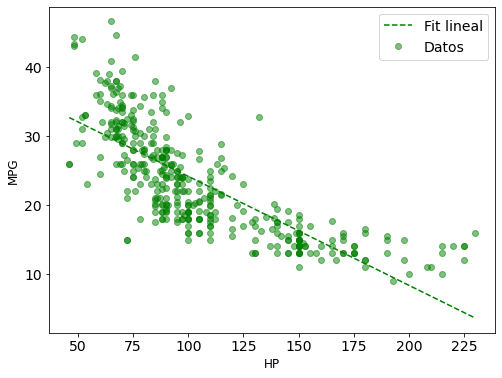

In [14]:
fig, ax = plt.subplots(1,1, figsize=(8,6))

#definir el vector x a graficar
grid = np.linspace(np.min(dfcars.horsepower), np.max(dfcars.horsepower), 100)

#predicciones para el vector x
y_fit=beta0+beta1*grid
#y_fit=results.predict(sm.add_constant(grid))

ax.plot(grid,y_fit, '--',color='g',label='Fit lineal')

ax.plot(dfcars.horsepower,dfcars.mpg, 'o',color='g',alpha=0.5,label='Datos') 

ax.set_xlabel("HP", fontsize=12)
ax.set_ylabel("MPG", fontsize=12)
ax.legend();

Lo mismo para la variable `weight`:

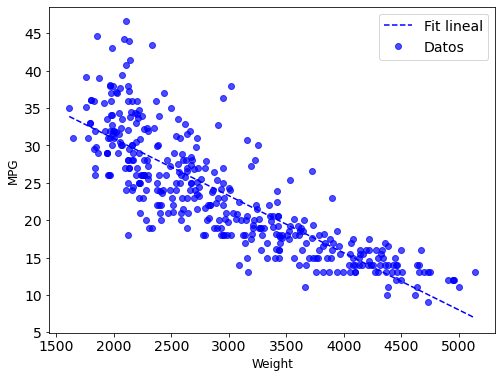

In [15]:
x2 = dfcars.weight
y = dfcars.mpg

X2 = sm.add_constant(x2)

regr2 = sm.OLS(y, X2)
res2 = regr2.fit()


fig, ax = plt.subplots(1,1, figsize=(8,6))
grid2 = np.linspace(np.min(dfcars.weight), np.max(dfcars.weight), 100)

y_fit_lineal=res2.predict(sm.add_constant(grid2))
#y_fit_lineal=beta0+beta1*grid

ax.plot(grid2,y_fit_lineal, '--',color='b',label='Fit lineal')

ax.plot(dfcars.weight,dfcars.mpg, 'o',color='b',alpha=0.7,label='Datos') 

ax.set_xlabel("Weight", fontsize=12)
ax.set_ylabel("MPG", fontsize=12)
ax.legend();

In [18]:
res2.rsquared

0.6926304331206254

In [19]:
from statsmodels.tools import eval_measures

y_pred2=res2.predict(X2)
rmse2= eval_measures.rmse(y,y_pred2)
print('Error cuadrático medio (weight):',rmse2)

Error cuadrático medio (weight): 4.321645126270701


In [20]:
print('Error cuadrático medio (hp):',rmse)

Error cuadrático medio (hp): 4.893226230065713
